In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import  RandomNormal
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
%matplotlib inline

In [ ]:
# Loading and preprocessing images
data = pd.read_csv("/content/fer2013.csv")

emotions_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
data['emotion_name'] = data['emotion'].map(emotions_names)

pixels_values = data.pixels.str.split(" ").tolist()
pixels_values = pd.DataFrame(pixels_values, dtype=int)
images = pixels_values.values
images = images.astype(np.float)

test_idx_start = 32298
images_test = images[test_idx_start:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df = pd.read_csv('/content/fer2013.csv') #read dataset

df.head(5),df.shape

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [ ]:
# Standarizing images
each_pixel_mean = images.mean(axis=0)
each_pixel_std = np.std(images, axis=0)
images = np.divide(np.subtract(images,each_pixel_mean), each_pixel_std)


image_pixels = images.shape[1]
image_width = image_height = np.ceil(np.sqrt(image_pixels)).astype(np.uint8)
labels_flat = data["emotion"].values.ravel()
labels_count = np.unique(labels_flat).shape[0]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D,MaxPool2D,ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import vgg16
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#for model deployement
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import img_to_array

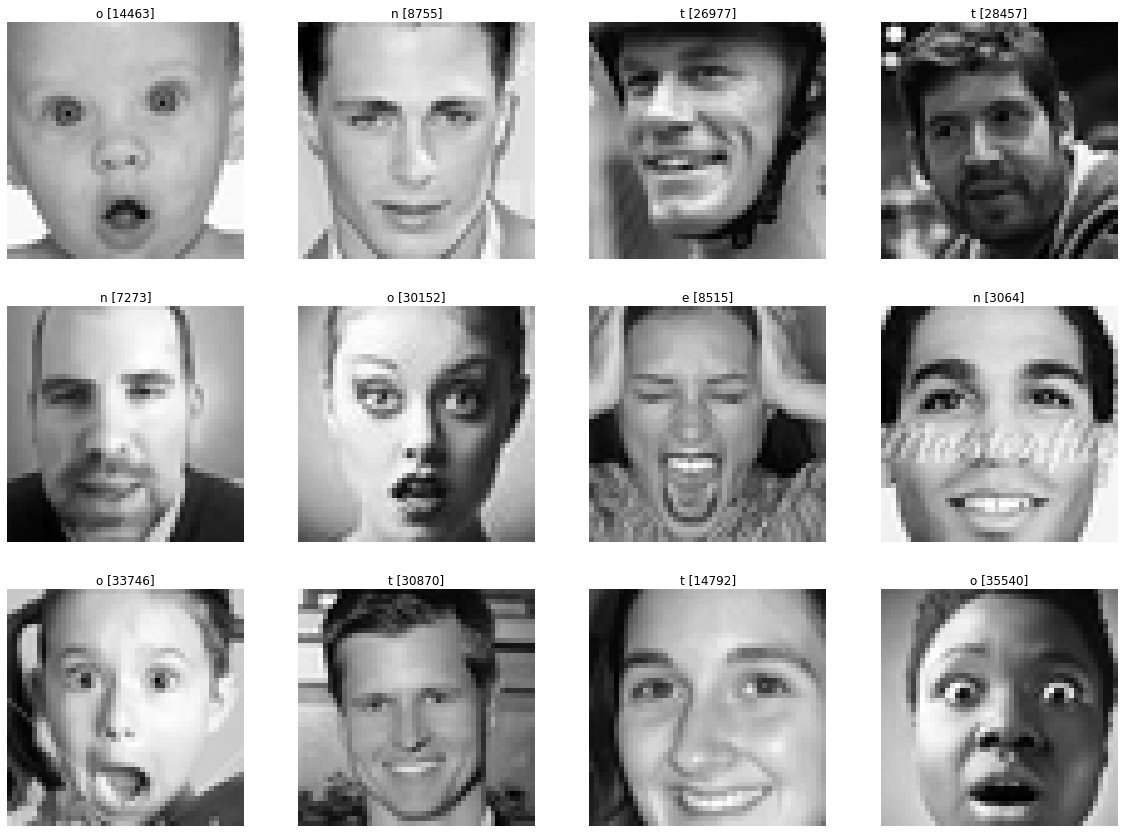

In [ ]:
# from PIL import Image
# pixels = df['pixels'][0]
# b = bytes(int(p) for p in pixels.split())
# i = Image.frombuffer('L',(48,48),b)
# di.save('a.png')
def visualize_images(n_img=4):
    indices = np.random.randint(0,df.shape[0],size=n_img)
#     print(indices)
    plt.figure(figsize=(20,20))
    for i,l in zip(indices,range(0,len(indices))):
        image_ar = np.array([i for i in  df['pixels'][i].split()] , dtype='float')
        pixels = np.reshape(image_ar,(48,48))
        ax = plt.subplot(4,4,l+1)
        plt.imshow(pixels,cmap='gray')
        plt.title('emotion'[df['emotion'][i]]+" ["+str(i)+"]")
        plt.xticks()
        plt.yticks([])
        plt.axis("off")
visualize_images(12)

In [ ]:
X_train,y_train = [],[]
X_val,y_val = [],[]
X_test,y_test = [],[]
for index,row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PrivateTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_val.append(np.array(k))
        y_val.append(row['emotion'])

X_train = np.array(X_train,dtype='float')
y_train = np.array(y_train)
X_test = np.array(X_test,dtype='float')
y_test = np.array(y_test)
X_val = np.array(X_val,dtype='float')
y_val = np.array(y_val)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((28709, 2304), (28709,), (3589, 2304), (3589,), (3589, 2304), (3589,))

**Decision Tree**

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

 DecisionTreeClassifier model with criterion gini index


In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2811


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([4, 4, 3, ..., 4, 3, 3])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.2898


In [ ]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.2898
Test set score: 0.2811


[Text(0.5, 0.875, 'X[1896] <= 93.5\ngini = 0.826\nsamples = 28709\nvalue = [3995, 436, 4097, 7215, 4830, 3171, 4965]'),
 Text(0.25, 0.625, 'X[791] <= 162.5\ngini = 0.835\nsamples = 8430\nvalue = [1306, 108, 1253, 1370, 1760, 1313, 1320]'),
 Text(0.125, 0.375, 'X[1664] <= 118.5\ngini = 0.823\nsamples = 5778\nvalue = [959, 78, 777, 1045, 1406, 471, 1042]'),
 Text(0.0625, 0.125, 'gini = 0.814\nsamples = 3769\nvalue = [652, 57, 437, 784, 913, 194, 732]'),
 Text(0.1875, 0.125, 'gini = 0.828\nsamples = 2009\nvalue = [307, 21, 340, 261, 493, 277, 310]'),
 Text(0.375, 0.375, 'X[1408] <= 170.5\ngini = 0.806\nsamples = 2652\nvalue = [347, 30, 476, 325, 354, 842, 278]'),
 Text(0.3125, 0.125, 'gini = 0.83\nsamples = 1200\nvalue = [231, 15, 243, 175, 199, 222, 115]'),
 Text(0.4375, 0.125, 'gini = 0.751\nsamples = 1452\nvalue = [116, 15, 233, 150, 155, 620, 163]'),
 Text(0.75, 0.625, 'X[1569] <= 167.5\ngini = 0.816\nsamples = 20279\nvalue = [2689, 328, 2844, 5845, 3070, 1858, 3645]'),
 Text(0.625, 0

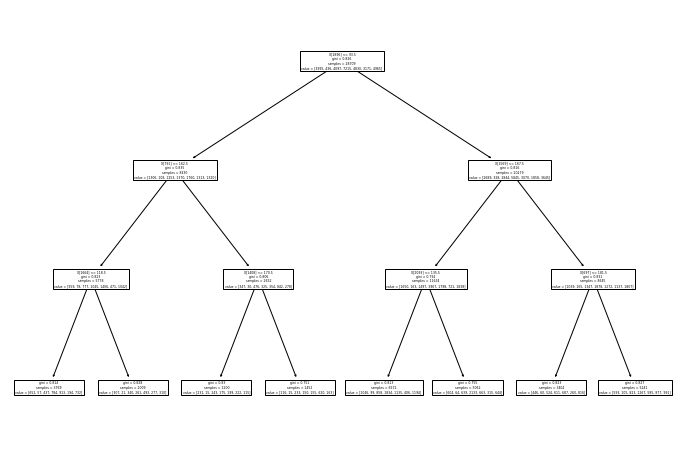

In [ ]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

Decision Tree Classifier with criterion entropy

In [ ]:


# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [ ]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.2664


In [ ]:
#Compare the train-set and test-set accuracy


y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([3, 4, 3, ..., 3, 3, 3])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.2841


In [ ]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.2841
Test set score: 0.2664


[Text(0.5, 0.875, 'X[743] <= 153.5\nentropy = 2.611\nsamples = 28709\nvalue = [3995, 436, 4097, 7215, 4830, 3171, 4965]'),
 Text(0.25, 0.625, 'X[1945] <= 67.5\nentropy = 2.54\nsamples = 13107\nvalue = [1967, 177, 1761, 3215, 2810, 720, 2457]'),
 Text(0.125, 0.375, 'X[2144] <= 71.5\nentropy = 2.59\nsamples = 2921\nvalue = [512, 45, 395, 441, 779, 274, 475]'),
 Text(0.0625, 0.125, 'entropy = 2.467\nsamples = 1472\nvalue = [263, 12, 168, 220, 433, 70, 306]'),
 Text(0.1875, 0.125, 'entropy = 2.647\nsamples = 1449\nvalue = [249, 33, 227, 221, 346, 204, 169]'),
 Text(0.375, 0.375, 'X[1569] <= 128.5\nentropy = 2.503\nsamples = 10186\nvalue = [1455, 132, 1366, 2774, 2031, 446, 1982]'),
 Text(0.3125, 0.125, 'entropy = 2.417\nsamples = 5164\nvalue = [741, 60, 580, 1697, 981, 160, 945]'),
 Text(0.4375, 0.125, 'entropy = 2.561\nsamples = 5022\nvalue = [714, 72, 786, 1077, 1050, 286, 1037]'),
 Text(0.75, 0.625, 'X[1896] <= 94.5\nentropy = 2.62\nsamples = 15602\nvalue = [2028, 259, 2336, 4000, 2020,

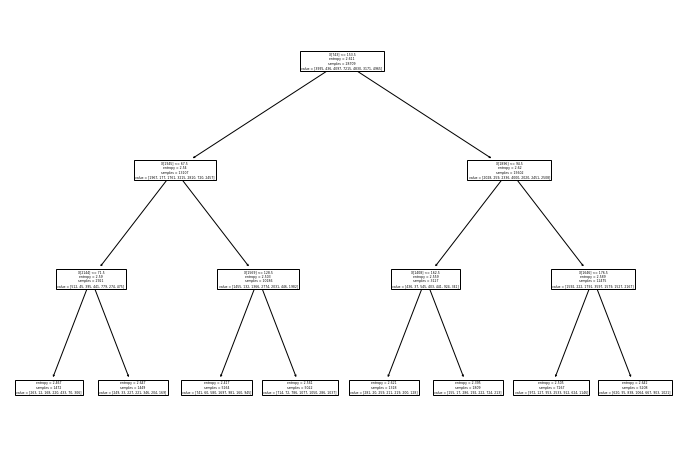

In [ ]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 37   0   0 369  57  28   0]
 [  4   0   0  43   5   3   0]
 [ 39   0   0 394  53  42   0]
 [ 35   0   0 750  71  23   0]
 [ 34   0   0 442  90  28   0]
 [ 22   0   0 272  43  79   0]
 [ 17   0   0 508  72  29   0]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.20      0.08      0.11       491
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00       528
           3       0.27      0.85      0.41       879
           4       0.23      0.15      0.18       594
           5       0.34      0.19      0.24       416
           6       0.00      0.00      0.00       626

    accuracy                           0.27      3589
   macro avg       0.15      0.18      0.14      3589
weighted avg       0.17      0.27      0.17      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


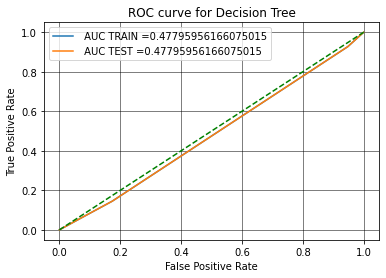

In [ ]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_test, y_pred_en,pos_label=1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_en, pos_label=1)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Decision Tree")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [ ]:
sigmoid(0)

0.5

In [ ]:
def initialize_params(X):
    n_features, m = X.shape
    W = np.random.rand(n_features, 1)
    b = 0
    return W, b, m, n_features

In [ ]:
def propagate(W, b, X, y):

    # Forward Prop
    m = X.shape[1]
    Z = np.dot(W.T, X) + b
    y_hat = sigmoid(Z)

    # cost
    cost = (1/m) * np.sum((-y * np.log(y_hat) - (1-y) * np.log(1- y_hat)))


    # Back Prop
    dZ = y_hat - y   # 1 x 68
    dW = 1/m * np.dot(X, dZ.T)
    db = 1/m * np.sum(dZ, keepdims=True)

    grads = {
        'dW':dW,
        'db':db
    }

    return grads, cost


In [ ]:
def optimize(X, y, W, b, lr, n_iters):

    cost_lst = []

    # Loop
    for _ in range(n_iters):
        grads, cost = propagate(W, b, X, y)

        dW = grads['dW']
        db = grads['db']

        W = W - lr*dW
        b = b - lr*db

        params = {
        'W':W,
        'b':b
        }

        cost_lst.append(cost)

    return params, cost_lst

In [ ]:
def predict(W, b, X):
    m = X.shape[1]
    Z = np.dot(W.T, X) + b
    y_hat = sigmoid(Z)

    i = range(m)
    y_preds = [1 if i > 0.5 else 0 for i in y_hat[0, i]]

    return y_preds

In [ ]:
def acc(a, b):
    # Both a and b are lists
    a = np.array(a)
    b = np.array(b)
    accuracy = np.mean( a == b )
    return accuracy

In [ ]:
def model(X_train, y_train, X_test, y_test, lr, n_iters):
    # Initialize
    W, b, m, n_features = initialize_params(X_train)
    W = W*0.001;

    # Model params
    params, cost_lst = optimize(X_train, y_train, W, b, lr, n_iters)

    W = params['W']
    b = params['b']

    y_preds = predict(W, b, X_test)

    accuracy = acc(y_preds, y_test)

    return y_preds, accuracy

In [ ]:
y_test

array([0, 5, 6, ..., 0, 3, 2])

In [ ]:
y_pred

array([3, 3, 6, ..., 4, 0, 6])

In [ ]:
#Classifying and prediction
classifier = LogisticRegression(random_state = 0)  #Logistic classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predicting test results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 82   0  46 167  85  42  69]
 [  9   0   8  22   5   2   9]
 [ 33   0  64 160  90  89  92]
 [ 41   0  40 608  75  40  75]
 [ 54   0  49 176 131  68 116]
 [ 13   0  40  84  46 187  46]
 [ 46   0  34 181  78  48 239]]


In [ ]:
accuracy_score(y_pred, y_test)

0.36528280858177764

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.17      0.21       491
           1       0.00      0.00      0.00        55
           2       0.23      0.12      0.16       528
           3       0.43      0.69      0.53       879
           4       0.26      0.22      0.24       594
           5       0.39      0.45      0.42       416
           6       0.37      0.38      0.38       626

    accuracy                           0.37      3589
   macro avg       0.28      0.29      0.28      3589
weighted avg       0.33      0.37      0.34      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


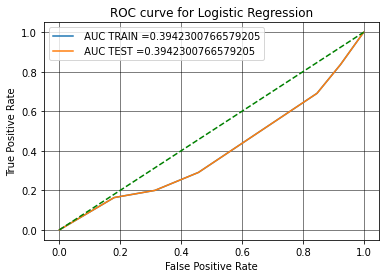

In [ ]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_test, y_pred,pos_label=1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**k Nearest Neighbour**

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
y_val

array([0, 1, 4, ..., 4, 4, 4])

In [ ]:
y_pred

array([3, 3, 6, ..., 4, 0, 6])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_val, y_pred)
ac = accuracy_score(y_val,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_val,y_pred))

[[147   9  46 118  47  18  82]
 [  6  20   5   8   6   5   6]
 [ 69   9 133 115  65  39  66]
 [ 82   8  84 413  92  47 169]
 [104  15  77 160 139  21 137]
 [ 38   6  60  63  22 173  53]
 [ 56  11  76 161  78  35 190]]


In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30       467
           1       0.26      0.36      0.30        56
           2       0.28      0.27      0.27       496
           3       0.40      0.46      0.43       895
           4       0.31      0.21      0.25       653
           5       0.51      0.42      0.46       415
           6       0.27      0.31      0.29       607

    accuracy                           0.34      3589
   macro avg       0.33      0.33      0.33      3589
weighted avg       0.34      0.34      0.34      3589



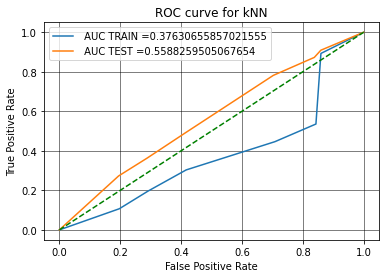

In [ ]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_val, y_pred,pos_label=1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for kNN")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()